# Preparation

1. Handle Missing Values
- Handle erroneous data and/or outliers you wish to address
- encode variables as needed
- new feature that represents tenure in years
- create single variable representing the information from phone_service and multiple_lines
- do the same using dependents and partner
- other ways to merge variables, such as streaming_tv & streaming_movies, online_security & - online_backup
- scale data as needed
- split data to train/validate/test

- Deliverable: Prepare.py


In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from acquire import get_telco_data

In [11]:
df = get_telco_data()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,...,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,churn
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,DSL,...,No,No,Yes,1,Month-to-month,No,2,Mailed check,59.9,No
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,DSL,...,Yes,Yes,Yes,1,Month-to-month,Yes,4,Credit card (automatic),69.4,No
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,DSL,...,No,No,No,1,Month-to-month,Yes,1,Electronic check,48.2,No
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,DSL,...,No,No,No,1,Month-to-month,Yes,1,Electronic check,25.1,Yes
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,DSL,...,No,No,No,1,Month-to-month,No,3,Bank transfer (automatic),30.5,Yes


## Check missing values

In [5]:
(df.isna()).sum()
#There is no missing values

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
internet_service_type       0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
contract_type               0
paperless_billing           0
payment_type_id             0
payment_type                0
monthly_charges             0
churn                       0
dtype: int64

## Drop unnecessary columns


In [6]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'internet_service_type', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract_type_id', 'contract_type', 'paperless_billing',
       'payment_type_id', 'payment_type', 'monthly_charges', 'churn'],
      dtype='object')

In [12]:
df = df.drop(columns = ['customer_id', 'gender','internet_service_type','payment_type', 'contract_type'])
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn
0,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,No
1,0,No,Yes,9,Yes,No,1,No,No,No,Yes,Yes,Yes,1,Yes,4,69.4,No
2,1,No,No,7,Yes,No,1,Yes,No,No,No,No,No,1,Yes,1,48.2,No
3,1,No,No,1,No,No phone service,1,No,No,No,No,No,No,1,Yes,1,25.1,Yes
4,0,Yes,Yes,1,No,No phone service,1,Yes,No,No,No,No,No,1,No,3,30.5,Yes


## Check if tenure is 0, if there are, drop them

In [13]:
(df.tenure == 0).sum()

11

In [17]:
df = df[df.tenure != 0]
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn
0,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,No
1,0,No,Yes,9,Yes,No,1,No,No,No,Yes,Yes,Yes,1,Yes,4,69.4,No
2,1,No,No,7,Yes,No,1,Yes,No,No,No,No,No,1,Yes,1,48.2,No
3,1,No,No,1,No,No phone service,1,No,No,No,No,No,No,1,Yes,1,25.1,Yes
4,0,Yes,Yes,1,No,No phone service,1,Yes,No,No,No,No,No,1,No,3,30.5,Yes


## Handle erroneous data and/or outliers you wish to address

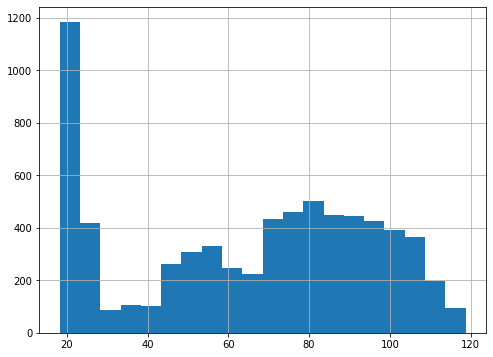

In [22]:
df.monthly_charges.hist(bins = 20, figsize = (8,6))

So There is no outliers

In [24]:
def encoder(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return x

In [39]:
for i in df.columns:
    df[i] = df[i].apply(encoder)

In [45]:
df['internet_service'] = (df.internet_service_type_id != 3).astype('int')
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn,internet_service
0,0,0,0,9,1,1,1,0,0,0,0,0,1,1,0,2,59.9,0,1
1,0,0,1,9,1,0,1,0,0,0,1,1,1,1,1,4,69.4,0,1
2,1,0,0,7,1,0,1,1,0,0,0,0,0,1,1,1,48.2,0,1
3,1,0,0,1,0,No phone service,1,0,0,0,0,0,0,1,1,1,25.1,1,1
4,0,1,1,1,0,No phone service,1,1,0,0,0,0,0,1,0,3,30.5,1,1


## new feature that represents tenure in years

In [51]:
df['tenure_year'] = (df.tenure/12 ).apply(np.floor).astype('int')
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn,internet_service,tenure_year
0,0,0,0,9,1,1,1,0,0,0,0,0,1,1,0,2,59.9,0,1,0
1,0,0,1,9,1,0,1,0,0,0,1,1,1,1,1,4,69.4,0,1,0
2,1,0,0,7,1,0,1,1,0,0,0,0,0,1,1,1,48.2,0,1,0
3,1,0,0,1,0,No phone service,1,0,0,0,0,0,0,1,1,1,25.1,1,1,0
4,0,1,1,1,0,No phone service,1,1,0,0,0,0,0,1,0,3,30.5,1,1,0


## create single variable representing the information from phone_service and multiple_lines